In [12]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

df = pd.read_csv('./creditcard.csv')
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [13]:
X = df [['V5', 'V6', 'V17', 'V19']]
Y = df['Class']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [14]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score
model = RandomForestClassifier(random_state=101).fit(X_train, Y_train)

In [15]:
predict = model.predict(X_test)

print(confusion_matrix(Y_test, predict)) #혼동홍행렬

[[56853    13]
 [   28    68]]


In [16]:
accuracy = accuracy_score(Y_test, predict)
accuracy

0.9992802219023208

In [17]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score



In [22]:
# 아래에 있는 애들이 전부 하이퍼 파라미터
random_search = {
    "criterion" : ['entropy', 'gini'],
    "max_depth" : [2],
    "max_features" : ['auto', 'sqrt'],
    "min_samples_leaf" : [4, 6, 8],
    "min_samples_split" : [5, 7, 10],
    "n_estimators" : [20]
}
'''
파라미터: 모델이 학습을 통해 데이터로부터 자동으로 조정하는 값들.
하이퍼파라미터: 학습 전에 사용자가 설정해야 하는 값들로, 모델 학습 및 성능에 영향을 미치는 값들.
이 두 가지를 구분하고 적절히 조정하는 것이 머신러닝 모델의 성능을 최적화하는 데 중요합니다.
'''

'\n파라미터: 모델이 학습을 통해 데이터로부터 자동으로 조정하는 값들.\n하이퍼파라미터: 학습 전에 사용자가 설정해야 하는 값들로, 모델 학습 및 성능에 영향을 미치는 값들.\n이 두 가지를 구분하고 적절히 조정하는 것이 머신러닝 모델의 성능을 최적화하는 데 중요합니다.\n'

In [23]:
clf = RandomForestClassifier()
model = RandomizedSearchCV(estimator=clf,
                           param_distributions=random_search,
                           n_iter=10,
                           cv = 4,
                           verbose=1,
                           random_state=101)

model.fit(X_train,Y_train)

Fitting 4 folds for each of 10 candidates, totalling 40 fits


/Users/yoonwogud/Desktop/Git/BlueMoon/BlueMoonEnv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
24 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
24 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/yoonwogud/Desktop/Git/BlueMoon/BlueMoonEnv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/yoonwogud/Desktop/Git/BlueMoon/BlueMoonEnv/lib/python3.12/site-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/Users/yoonwogud/Desktop/Git/BlueMoon/BlueMoonEnv/lib/python3.12/site-

RandomizedSearchCV(cv=4, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [2],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [4, 6, 8],
                                        'min_samples_split': [5, 7, 10],
                                        'n_estimators': [20]},
                   random_state=101, verbose=1)

In [28]:
pd.DataFrame(model.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_criterion,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.007017,0.000350,0.000000,0.000000,20,5,4,auto,2,gini,"{'n_estimators': 20, 'min_samples_split': 5, '...",NaN,NaN,NaN,NaN,NaN,NaN,5
1,0.005273,0.001024,0.000000,0.000000,20,7,8,auto,2,entropy,"{'n_estimators': 20, 'min_samples_split': 7, '...",NaN,NaN,NaN,NaN,NaN,NaN,5
2,0.003386,0.000351,0.000000,0.000000,20,10,4,auto,2,gini,"{'n_estimators': 20, 'min_samples_split': 10, ...",NaN,NaN,NaN,NaN,NaN,NaN,5
3,1.132366,0.058391,0.010223,0.000508,20,10,6,sqrt,2,gini,"{'n_estimators': 20, 'min_samples_split': 10, ...",0.999052,0.998420,0.999122,0.999157,0.998938,0.000301,4
4,1.074773,0.017256,0.009316,0.000187,20,5,6,sqrt,2,gini,"{'n_estimators': 20, 'min_samples_split': 5, '...",0.999087,0.998947,0.999140,0.999122,0.999074,0.000076,2
5,0.002208,0.000116,0.000000,0.000000,20,10,8,auto,2,gini,"{'n_estimators': 20, 'min_samples_split': 10, ...",NaN,NaN,NaN,NaN,NaN,NaN,5
6,0.002370,0.000107,0.000000,0.000000,20,7,8,auto,2,gini,"{'n_estimators': 20, 'min_samples_split': 7, '...",NaN,NaN,NaN,NaN,NaN,NaN,5
7,1.085408,0.007596,0.010180,0.000513,20,5,4,sqrt,2,gini,"{'n_estimators': 20, 'min_samples_split': 5, '...",0.999017,0.998999,0.999087,0.999192,0.999074,0.000076,1
8,1.133012,0.052260,0.009604,0.000803,20,5,8,sqrt,2,gini,"{'n_estimators': 20, 'min_samples_split': 5, '...",0.999087,0.998947,0.999087,0.999175,0.999074,0.000082,2
9,0.002406,0.000086,0.000000,0.000000,20,10,4,auto,2,entropy,"{'n_estimators': 20, 'min_samples_split': 10, ...",NaN,NaN,NaN,NaN,NaN,NaN,5


<Axes: xlabel='param_criterion', ylabel='param_n_estimators'>

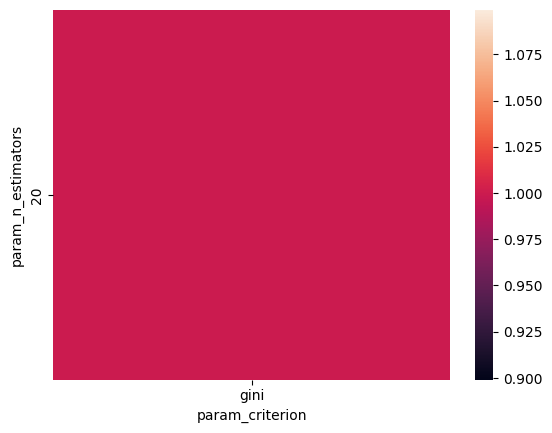

In [30]:
import seaborn as sns
table = pd.pivot_table(pd.DataFrame(                      model.cv_results_),
                       values='mean_test_score',
                       index = 'param_n_estimators',
                       columns = 'param_criterion')
sns.heatmap(table)

In [31]:
model.best_estimator_ # 모델이 학습하면서 제일 좋았던 것을 인쇄, 최고의 파라미터 조합을 확인

RandomForestClassifier(max_depth=2, min_samples_leaf=4, min_samples_split=5,
                       n_estimators=20)

In [ ]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV

